In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
start = '2016-01-01'
end = '2017-01-01'

asset = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

In [8]:
asset_returns = asset.pct_change(1)[1:]
benchmark_returns = benchmark.pct_change(1)[1:]

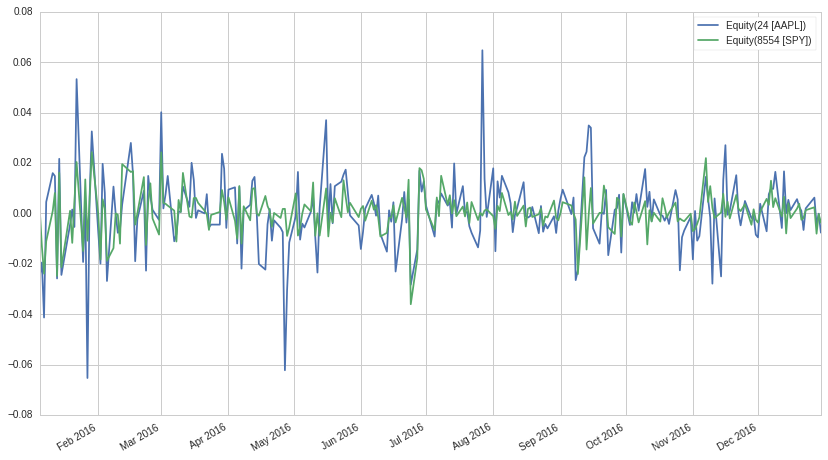

In [10]:
asset_returns.plot()
benchmark_returns.plot()
plt.legend()

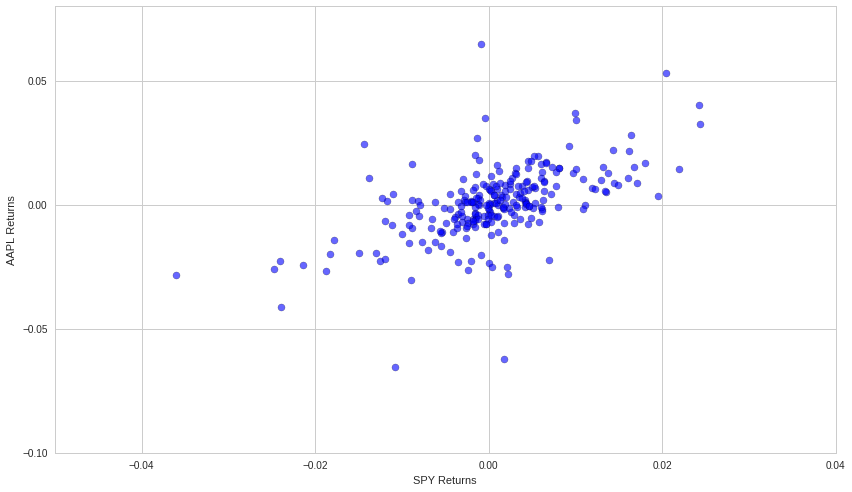

In [12]:
plt.scatter(benchmark_returns, asset_returns, alpha=0.6, s=50)
plt.xlabel('SPY Returns')
plt.ylabel('AAPL Returns')

In [13]:
AAPL = asset_returns.values
spy = benchmark_returns.values

In [14]:
spy_constant = sm.add_constant(spy)

In [16]:
model = regression.linear_model.OLS(AAPL, spy_constant).fit()

In [19]:
alpha, beta = model.params

alpha, beta

(1.6799024809993564e-05, 1.0298136979465768)

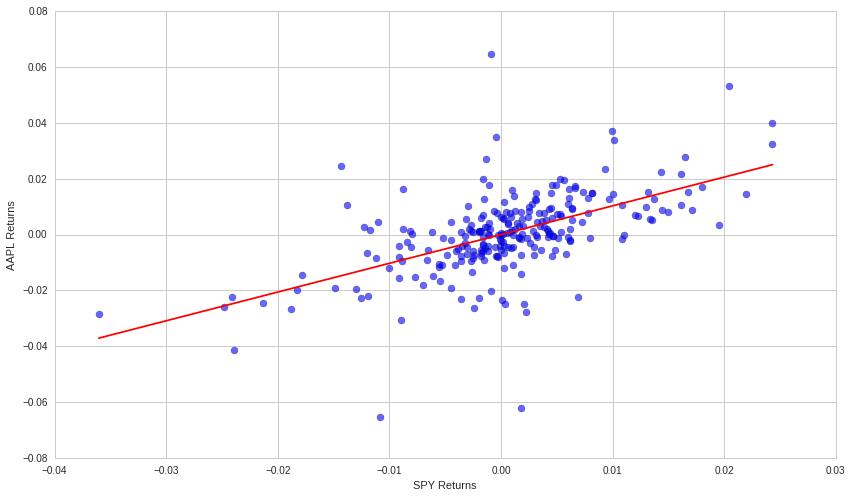

In [21]:
min_spy = benchmark_returns.values.min()
max_spy = benchmark_returns.values.max()

spy_line = np.linspace(min_spy, max_spy, 100)
y = spy_line*beta + alpha

plt.plot(spy_line, y, 'r')
plt.scatter(benchmark_returns, asset_returns, alpha=0.6, s=50)
plt.xlabel('SPY Returns')
plt.ylabel('AAPL Returns')

In [23]:
hedged = -1 *(beta*benchmark_returns) + asset_returns

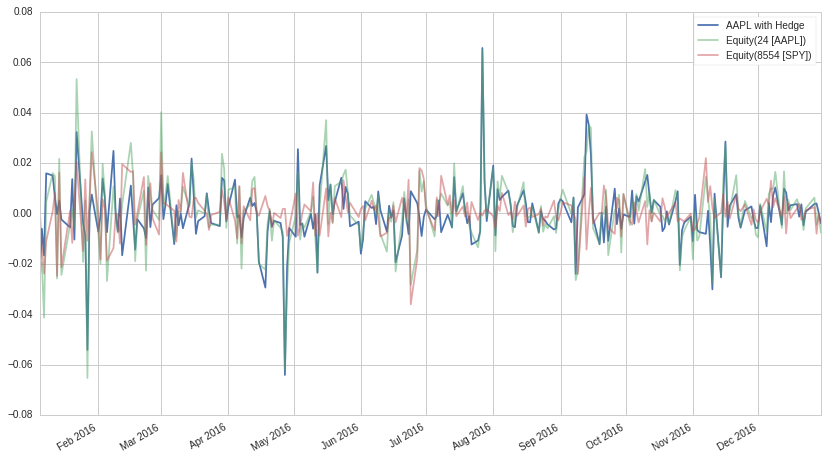

In [24]:
hedged.plot(label='AAPL with Hedge')
asset_returns.plot(alpha=0.5)
benchmark_returns.plot(alpha=0.5)
plt.legend()

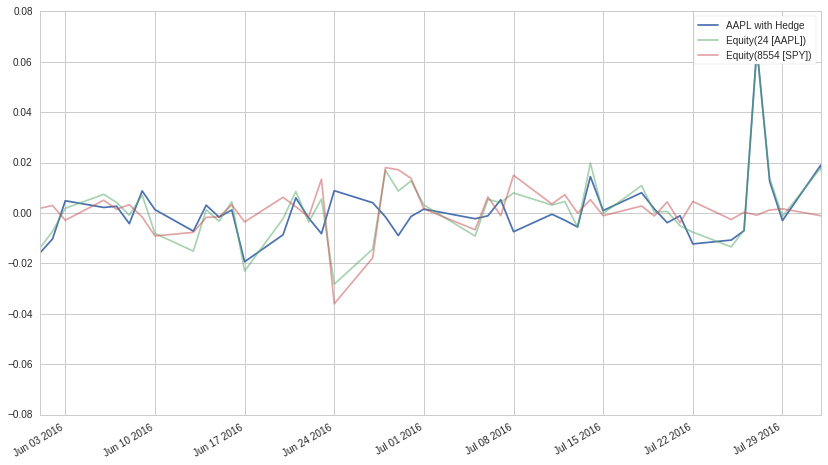

In [25]:
hedged.plot(label='AAPL with Hedge')
asset_returns.plot(alpha=0.5)
benchmark_returns.plot(alpha=0.5)

plt.xlim(['2016-06-01', '2016-08-01'])

plt.legend()

In [26]:
def alpha_beta(benchmark_returns, stock):
    benchmark = sm.add_constant(benchmark_returns)
    model = regression.linear_model.OLS(stock, benchmark).fit()
    return model.params[0], model.params[1]

In [27]:
start = '2016-01-01'
end = '2017-01-01'

asset_2016 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark_2016 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_returns_2016 = asset_2016.pct_change(1)[1:]
benchmark_returns_2016 = benchmark_2016.pct_change(1)[1:]

aret_values = asset_returns_2016.values
bret_values = benchmark_returns_2016.values

alpha_2016, beta_2016 = alpha_beta(bret_values, aret_values)

print('2016 Values')
print('alpha ' + str(alpha_2016))
print('beta ' + str(beta_2016))

2016 Values
alpha 1.679902481e-05
beta 1.02981369795


In [37]:
portfolio = -1 *(beta_2016*benchmark_returns_2016) + asset_returns_2016

alpha, beta = alpha_beta(benchmark_returns_2016, portfolio)

print('PORTFOLIO ALPHA AND BETA')
print('alpha ' + str(alpha))
print('beta ' + str(beta))

PORTFOLIO ALPHA AND BETA
alpha 1.679902481e-05
beta 1.36609473733e-16


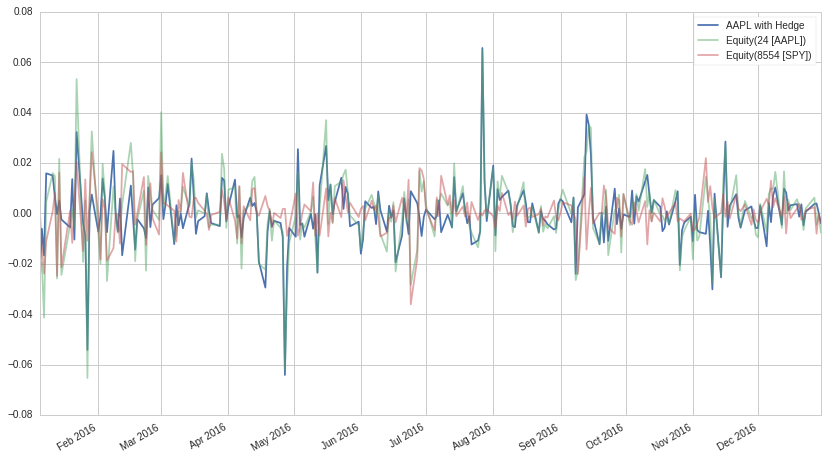

In [38]:
portfolio.plot(label='AAPL with Hedge')
asset_returns_2016.plot(alpha=0.5)
benchmark_returns_2016.plot(alpha=0.5)

plt.legend()

In [39]:
portfolio.mean()

1.6799024809993652e-05

In [40]:
asset_returns_2016.mean()

0.000574549568770769

In [41]:
portfolio.std()

0.012065447808277703

In [42]:
asset_returns_2016.std()

0.014702747344261722

In [44]:
start = '2017-01-01'
end = '2018-01-01'

asset_2017 = get_pricing('AAPL', fields='price', start_date=start, end_date=end)
benchmark_2017 = get_pricing('SPY', fields='price', start_date=start, end_date=end)

asset_returns_2017 = asset_2017.pct_change(1)[1:]
benchmark_returns_2017 = benchmark_2017.pct_change(1)[1:]

aret_values = asset_returns_2017.values
bret_values = benchmark_returns_2017.values

alpha_2017, beta_2017 = alpha_beta(bret_values, aret_values)

print('2017 Values')
print('alpha ' + str(alpha_2017))
print('beta ' + str(beta_2017))

2017 Values
alpha 0.000572942696746
beta 1.38560876067


In [45]:
portfolio = -1 *(beta_2016*benchmark_returns_2017) + asset_returns_2017

alpha, beta = alpha_beta(benchmark_returns_2017, portfolio)

print('PORTFOLIO ALPHA AND BETA')
print('alpha ' + str(alpha))
print('beta ' + str(beta))

PORTFOLIO ALPHA AND BETA
alpha 0.000572942696746
beta 0.355795062727


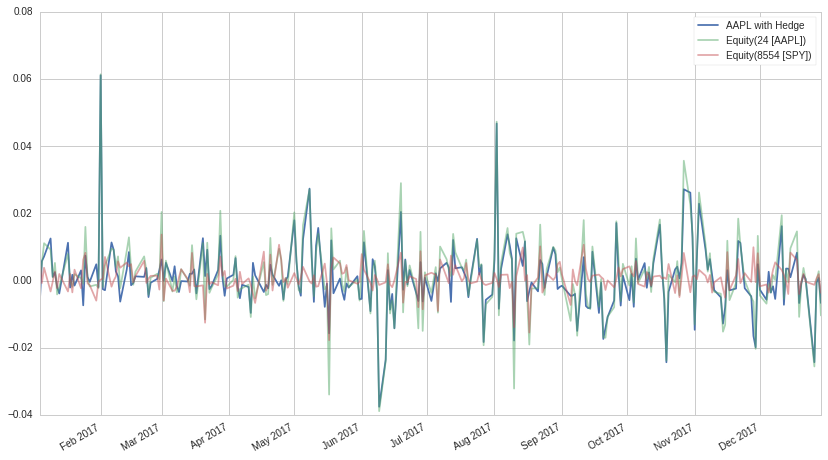

In [46]:
portfolio.plot(label='AAPL with Hedge')
asset_returns_2017.plot(alpha=0.5)
benchmark_returns_2017.plot(alpha=0.5)

plt.legend()

In [48]:
asset_returns_2017.mean()

0.0016340833669061569

In [50]:
portfolio.mean()

0.000845421207287768

In [51]:
asset_returns_2017.std()

0.011146544872591061

In [52]:
portfolio.std()

0.009658212016325187